In [1]:
from src import CompanyDetails, SharePricePrediction
import matplotlib.pyplot as plt
import pandas as pd
from src import Analyse
import numpy as np
import datetime

In [2]:
c_company_list = ['TATAMOTORS','KOTAKBANK','LT', 'ITC']
c_name = c_company_list[0]
SharePricePrediction = SharePricePrediction(c_name)

prediction = SharePricePrediction.prediction(pred_range=8, n=3)
share_price_df = prediction['share_price_df']
ema_window = prediction['windowed_df']


In [3]:
print(ema_window)

     Target Date    Target-3    Target-2    Target-1      Target
0     2018-03-28  405.096980  404.352731  403.604047  402.820226
1     2018-04-02  404.352731  403.604047  402.820226  402.165895
2     2018-04-03  403.604047  402.820226  402.165895  401.557081
3     2018-04-04  402.820226  402.165895  401.557081  401.077906
4     2018-04-05  402.165895  401.557081  401.077906  400.668772
...          ...         ...         ...         ...         ...
1723  2025-03-20  806.715991  805.266579  804.042533  802.908279
1724  2025-03-21  805.266579  804.042533  802.908279  801.913669
1725  2025-03-24  804.042533  802.908279  801.913669  801.033931
1726  2025-03-25  802.908279  801.913669  801.033931  800.131106
1727  2025-03-26  801.913669  801.033931  800.131106  799.216866

[1728 rows x 5 columns]


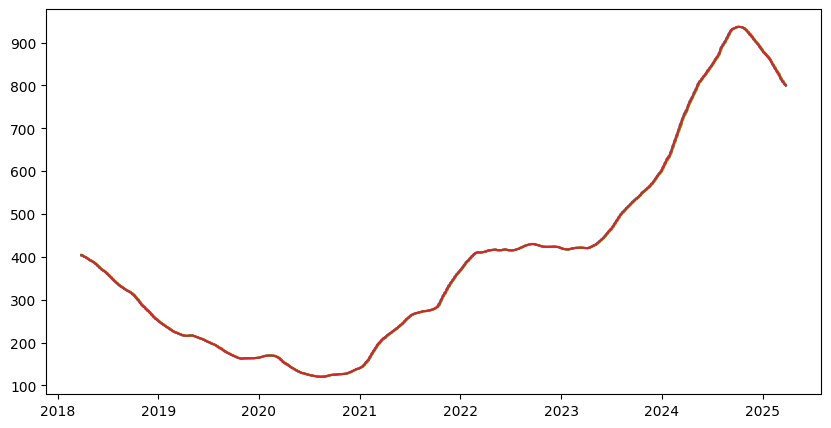

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(ema_window['Target Date'], ema_window['Target'])
plt.plot(ema_window['Target Date'], ema_window['Target-3'])
plt.plot(ema_window['Target Date'], ema_window['Target-2'])
plt.plot(ema_window['Target Date'], ema_window['Target-1'])

In [5]:
print(share_price_df.Close)

Date
2017-03-27    461.88
2017-03-28    469.48
2017-03-29    466.15
2017-03-30    465.51
2017-03-31    462.97
               ...  
2025-03-20    690.05
2025-03-21    702.95
2025-03-24    713.50
2025-03-25    710.30
2025-03-26    708.25
Name: Close, Length: 1978, dtype: float64


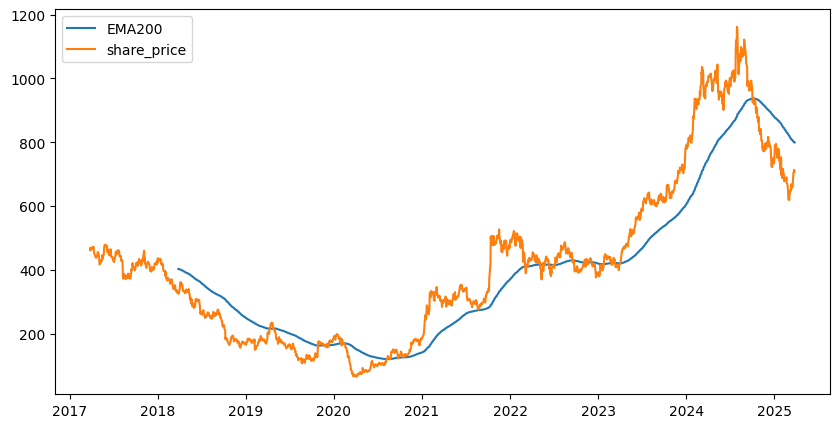

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(ema_window['Target Date'], ema_window['Target'], label='EMA200')
plt.plot(share_price_df.index, share_price_df.Close, label='share_price')
plt.legend()


In [7]:
ema_train_test_valid = SharePricePrediction.trainTestValidation(ema_window)

Epoch 1/100
44/44 [==============================] - 2s 13ms/step - loss: 100460.0312 - mean_absolute_error: 292.5522 - val_loss: 506585.6250 - val_mean_absolute_error: 704.4790
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 93496.0625 - mean_absolute_error: 280.2971 - val_loss: 468034.0938 - val_mean_absolute_error: 676.5619
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 62722.5352 - mean_absolute_error: 215.1950 - val_loss: 329753.4375 - val_mean_absolute_error: 565.1521
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 22225.5566 - mean_absolute_error: 120.7709 - val_loss: 192856.6250 - val_mean_absolute_error: 427.2868
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 11345.9297 - mean_absolute_error: 92.3657 - val_loss: 151611.2500 - val_mean_absolute_error: 376.0016
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 2380.5425 - mean_absolute_error: 30.8051 - val

In [8]:
emattv = ema_train_test_valid
for val in emattv:
    print(f'{val}  :  {emattv[val]}  | length {len(emattv[val])}')

dates_train  :  [Timestamp('2018-03-28 00:00:00') Timestamp('2018-04-02 00:00:00')
 Timestamp('2018-04-03 00:00:00') ... Timestamp('2023-10-26 00:00:00')
 Timestamp('2023-10-27 00:00:00') Timestamp('2023-10-30 00:00:00')]  | length 1381
y_train  :  [402.82022 402.1659  401.55707 ... 552.57025 553.431   554.1588 ]  | length 1381
train_prediction  :  [404.317   403.54556 402.87057 ... 547.63257 548.19385 548.7848 ]  | length 1381
dates_valid  :  [Timestamp('2023-10-31 00:00:00') Timestamp('2023-11-01 00:00:00')
 Timestamp('2023-11-02 00:00:00') Timestamp('2023-11-03 00:00:00')
 Timestamp('2023-11-06 00:00:00') Timestamp('2023-11-07 00:00:00')
 Timestamp('2023-11-08 00:00:00') Timestamp('2023-11-09 00:00:00')
 Timestamp('2023-11-10 00:00:00') Timestamp('2023-11-13 00:00:00')
 Timestamp('2023-11-15 00:00:00') Timestamp('2023-11-16 00:00:00')
 Timestamp('2023-11-17 00:00:00') Timestamp('2023-11-20 00:00:00')
 Timestamp('2023-11-21 00:00:00') Timestamp('2023-11-22 00:00:00')
 Timestamp('2023

In [18]:
model = SharePricePrediction.model
future_year = 5
offset_ratio = 0.05
last_row = share_price_df.iloc[-1]
last_know_date = share_price_df.index[-1]
last_close = last_row['Close']
last_ema = last_row['ema200']

uptrend = last_close > last_ema
window_size = SharePricePrediction.model.input_shape[1]
last_window = share_price_df['ema200'].tail(window_size).to_numpy().reshape(window_size, 1)

future_months = []
current_month = (last_know_date.year, last_know_date.month)

for _ in range(future_year * 12):
    year, month = current_month
    month += 1
    if month > 12:
        month = 1
        year += 1
    current_month = (year, month)
    future_months.append(datetime.datetime(year=year, month=month, day=1))

print(future_months)
print(model)


[datetime.datetime(2025, 4, 1, 0, 0), datetime.datetime(2025, 5, 1, 0, 0), datetime.datetime(2025, 6, 1, 0, 0), datetime.datetime(2025, 7, 1, 0, 0), datetime.datetime(2025, 8, 1, 0, 0), datetime.datetime(2025, 9, 1, 0, 0), datetime.datetime(2025, 10, 1, 0, 0), datetime.datetime(2025, 11, 1, 0, 0), datetime.datetime(2025, 12, 1, 0, 0), datetime.datetime(2026, 1, 1, 0, 0), datetime.datetime(2026, 2, 1, 0, 0), datetime.datetime(2026, 3, 1, 0, 0), datetime.datetime(2026, 4, 1, 0, 0), datetime.datetime(2026, 5, 1, 0, 0), datetime.datetime(2026, 6, 1, 0, 0), datetime.datetime(2026, 7, 1, 0, 0), datetime.datetime(2026, 8, 1, 0, 0), datetime.datetime(2026, 9, 1, 0, 0), datetime.datetime(2026, 10, 1, 0, 0), datetime.datetime(2026, 11, 1, 0, 0), datetime.datetime(2026, 12, 1, 0, 0), datetime.datetime(2027, 1, 1, 0, 0), datetime.datetime(2027, 2, 1, 0, 0), datetime.datetime(2027, 3, 1, 0, 0), datetime.datetime(2027, 4, 1, 0, 0), datetime.datetime(2027, 5, 1, 0, 0), datetime.datetime(2027, 6, 1, 0

In [19]:
future_ema200 = []
current_window = last_window.copy()

for _ in range(future_year * 12):
    # Reshape for the model (1, window_size, 1)
    input_data = np.expand_dims(current_window, axis=0)
    # Predict the next month's EMA value
    pred_ema = model.predict(input_data)
    pred_ema_val = pred_ema.flatten()[0]
    
    # Store predicted EMA200
    future_ema200.append(pred_ema_val)
    
    # Slide the window by removing oldest value, adding new predicted value
    current_window = np.vstack([current_window[1:], [[pred_ema_val]]])

print(future_ema200)

1/1 [==============================] - 0s 25ms/step
[589.6799, 575.9364, 563.4763, 556.83215, 551.70233, 547.8759, 544.7915, 542.2681, 540.14404, 538.3281, 536.75165, 535.36707, 534.1387, 533.0394, 532.0485, 531.1495, 530.32904, 529.5767, 528.88354, 528.2423, 527.64703, 527.09247, 526.5743, 526.0888, 525.6327, 525.20325, 524.7979, 524.4146, 524.0514, 523.7066, 523.3788, 523.06665, 522.7689, 522.48456, 522.21265, 521.9523, 521.7027, 521.4632, 521.2331, 521.0117, 520.7987, 520.5934, 520.39545, 520.20435, 520.0197, 519.84125, 519.6686, 519.5014, 519.3395, 519.18243, 519.03015, 518.88226, 518.7387, 518.5991, 518.46344, 518.33136, 518.2028, 518.0777, 517.95575, 517.8369]


In [20]:
future_share_price = []
for ema_val in future_ema200:
    if uptrend:
        # Uptrend => share_price slightly above EMA
        # e.g. share_price = EMA * (1 + offset_ratio)
        share_val = ema_val * (1 + offset_ratio)
    else:
        # Downtrend => share_price slightly below EMA
        # e.g. share_price = EMA * (1 - offset_ratio)
        share_val = ema_val * (1 - offset_ratio)
    
    future_share_price.append(share_val)

print(future_share_price)

[560.1958770751953, 547.1395812988281, 535.3025024414062, 528.9905456542969, 524.1172149658203, 520.4821197509765, 517.5519287109374, 515.1547210693359, 513.1368408203125, 511.41171875, 509.9140655517578, 508.5987121582031, 507.43173828125, 506.3874572753906, 505.4460968017578, 504.5920013427734, 503.8125885009765, 503.09788513183594, 502.4393676757812, 501.83019409179684, 501.2646820068359, 500.7378448486328, 500.2455657958984, 499.78436584472655, 499.3510559082031, 498.9430847167969, 498.5580169677734, 498.1938812255859, 497.84882202148435, 497.5212738037109, 497.2098449707031, 496.91331787109374, 496.6304748535156, 496.3603302001953, 496.1020141601562, 495.85465698242183, 495.6175628662109, 495.39003601074216, 495.1714385986328, 494.96113281249995, 494.7587707519531, 494.56371459960934, 494.37567443847655, 494.1941284179687, 494.0187286376953, 493.84918518066405, 493.6851501464844, 493.526333618164, 493.37250366210935, 493.2233123779297, 493.0786437988281, 492.938150024414, 492.8017

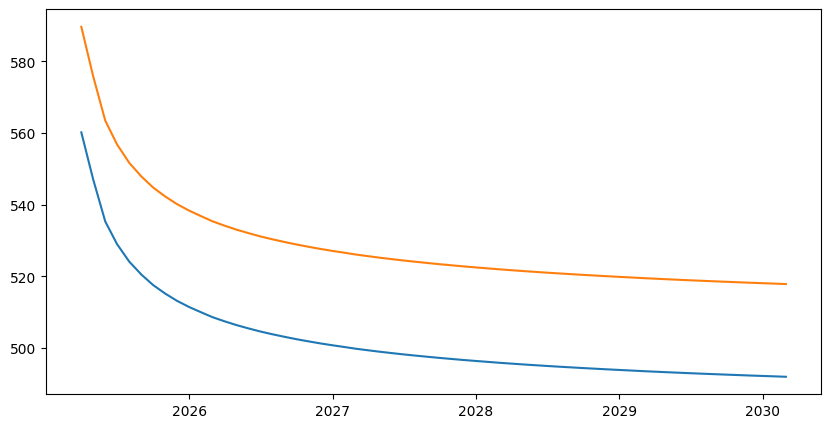

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(future_months, future_share_price)
plt.plot(future_months, future_ema200)

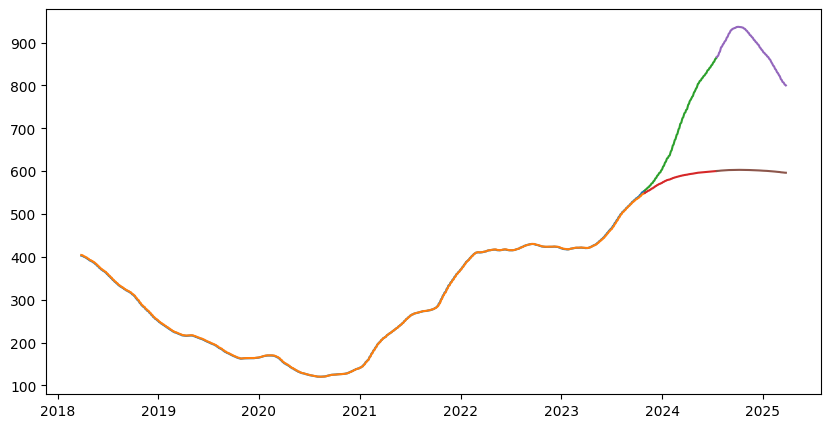

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(emattv['dates_train'], emattv['y_train'])
plt.plot(emattv['dates_train'], emattv['train_prediction'])
plt.plot(emattv['dates_valid'], emattv['y_valid'])
plt.plot(emattv['dates_valid'], emattv['valid_prediction'])
plt.plot(emattv['dates_test'], emattv['y_test'])
plt.plot(emattv['dates_test'], emattv['test_prediction'])

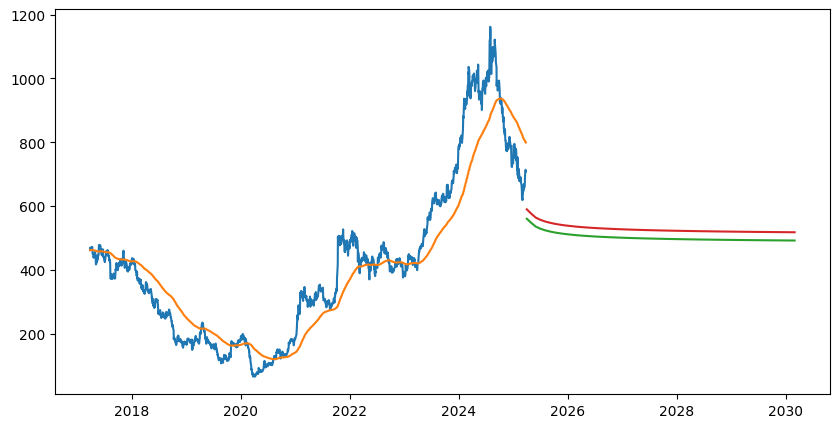

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(share_price_df.index, share_price_df['Close'])
plt.plot(share_price_df.index, share_price_df['ema200'])
plt.plot(future_months, future_share_price)
plt.plot(future_months, future_ema200)

In [11]:
print(share_price_df)

             Close      ema100      ema200
Date                                      
2017-03-27  461.88  461.880000  461.880000
2017-03-28  469.48  462.030495  461.955622
2017-03-29  466.15  462.112069  461.997357
2017-03-30  465.51  462.179355  462.032309
2017-03-31  462.97  462.195011  462.041639
...            ...         ...         ...
2025-03-19  682.25  749.693285  804.042533
2025-03-20  690.05  748.512229  802.908279
2025-03-21  702.95  747.610007  801.913669
2025-03-24  713.50  746.934561  801.033931
2025-03-25  710.30  746.209125  800.131106

[1977 rows x 3 columns]


In [12]:
future_year = 5
last_record = share_price_df.iloc[-1]
offset = last_record['Close'] - last_record['ema200']
model = SharePricePrediction.model
window_size = SharePricePrediction.model.input_shape[-1]
last_know_window = share_price_df['ema200'].tail(window_size).to_numpy().reshape(window_size, 1)
num_days = future_year * 252
future_dates = pd.bdate_range(share_price_df.index[-1] + pd.Timedelta(days=1), periods=num_days)
print(future_dates)

DatetimeIndex(['2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31',
               '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04',
               '2025-04-07', '2025-04-08',
               ...
               '2030-01-09', '2030-01-10', '2030-01-11', '2030-01-14',
               '2030-01-15', '2030-01-16', '2030-01-17', '2030-01-18',
               '2030-01-21', '2030-01-22'],
              dtype='datetime64[ns]', length=1260, freq='B')


In [13]:
future_ema200 = []
current_window = last_know_window.copy()

for _ in range(num_days):
    input_date = np.expand_dims(current_window, axis=0)
    pred = model.predict(input_date)
    pred_value = pred.flatten()[0]
    future_ema200.append(pred_value)
    current_window = np.vstack([current_window[1:], [[pred_value]]])

1/1 [==============================] - 0s 17ms/step


In [14]:
future_share_price = [round(ema_val + offset, 2) for ema_val in future_ema200]
print(future_ema200)
print(future_share_price)

[476.33115, 475.9393, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371, 475.9371

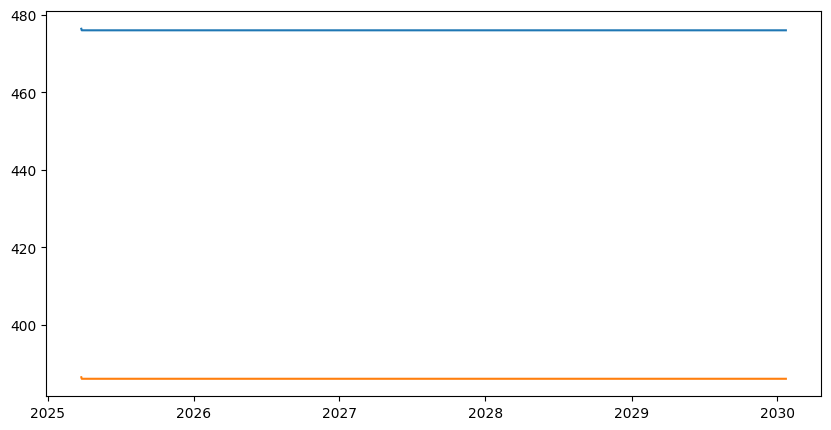

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_ema200)
plt.plot(future_dates, future_share_price)